In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df_transaction = pd.read_csv("../Data Cafe test/Data Cafe Test Before Interview/dh_transactions.csv",sep=',')
df_store = pd.read_csv('../Data Cafe test/Data Cafe Test Before Interview/dh_store_lookup.csv',sep=",")
df_product = pd.read_csv('../Data Cafe test/Data Cafe Test Before Interview/dh_product_lookup.csv',sep=",")
df_causal = pd.read_csv('../Data Cafe test/Data Cafe Test Before Interview/dh_causal_lookup.csv',sep=",")

In [3]:
print("Transaction dataset: {}\nStore dataset: {}\nProduct dataset: {}\nCausal dataset: {}".format(
    df_transaction.shape, df_store.shape, df_product.shape, df_causal.shape))

Transaction dataset: (5197681, 11)
Store dataset: (387, 2)
Product dataset: (927, 5)
Causal dataset: (351372, 6)


In [4]:
df_transaction.isnull().sum()

upc                    0
dollar_sales           0
units                  0
time_of_transaction    0
geography              0
week                   0
household              0
store                  0
basket                 0
day                    0
coupon                 0
dtype: int64

In [5]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197681 entries, 0 to 5197680
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  int64  
 1   dollar_sales         float64
 2   units                int64  
 3   time_of_transaction  int64  
 4   geography            int64  
 5   week                 int64  
 6   household            int64  
 7   store                int64  
 8   basket               int64  
 9   day                  int64  
 10  coupon               int64  
dtypes: float64(1), int64(10)
memory usage: 436.2 MB


In [6]:
df_check = df_transaction.iloc[np.r_[0:5, -5:0]]
df_check

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0
5197676,9999985001,0.39,1,2354,1,104,435465,199,3316346,728,0
5197677,9999966720,1.05,1,2354,1,104,435465,199,3316346,728,0
5197678,9999985027,0.99,1,2311,1,104,352690,218,3316347,728,0
5197679,3620000300,1.53,1,2245,1,104,55530,93,3316348,728,0
5197680,1510000073,0.99,1,2209,1,104,435755,18,3316349,728,0


## Nice dataset, No null value
### NEXT!!
we will merge df_transaction and df_product should help to do EDA esier.

In [7]:
df = df_transaction.merge(df_product[['upc','product_description','commodity','brand','product_size']], how='left', on='upc')
df.head(10)

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,BERTOLLI TOM&BASIL SAUCE,pasta sauce,Bertolli,24 OZ
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0,H J PANCK BTRMLK COMP MIX,pancake mixes,Hungry Jack,
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0,PRIVATE LABEL VERMICELLI,pasta,Private Label,16 OZ
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0,PRIVATE LABEL IMPORTED LASAGNA,pasta,Private Label Premium,16 OZ
5,5100002794,2.19,1,1323,2,1,89437,244,4,1,0,PREGO SPAG SAUCE MEAT,pasta sauce,Prego,26 OZ
6,1800000957,3.45,1,1415,2,1,158549,244,5,1,0,PILL H J MWV LITE SYRUP,syrups,Hungry Jack,27.6 OZ
7,9999985051,1.29,1,1415,2,1,158549,244,5,1,0,PRIVATE LABEL SPAGHETTI THIN,pasta,Private Label,32OZ
8,9999985053,0.75,1,1513,2,1,18851,244,6,1,0,PRIVATE LABEL CONCHIGLIE RIGATE SHL,pasta,Private Label Premium,16 OZ
9,3620000446,2.19,1,1523,2,1,118337,244,7,1,0,RAGU GARDEN SUPER VEG SCE,pasta sauce,Ragu,26 OZ


In [8]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197681 entries, 0 to 5197680
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  int64  
 1   dollar_sales         float64
 2   units                int64  
 3   time_of_transaction  int64  
 4   geography            int64  
 5   week                 int64  
 6   household            int64  
 7   store                int64  
 8   basket               int64  
 9   day                  int64  
 10  coupon               int64  
dtypes: float64(1), int64(10)
memory usage: 436.2 MB


In [9]:
# product_description unique value
len(pd.unique(df['product_description']))

872

# Let's Create some futures.
1. assume first day (1) is monday.
2. assume first week (1) is first week of Jan.
3. create 3 more dataframes.
- month
(start at Jan if value mod 12 = 1 that is Jan, if value mod 12 = 2 that is Feb [result is 1 to 12])
- day of week
(such as, if value mod 7 = 1 that is monday, if value mod 7 = 2 that is tuesday. [result is 1 to 7])
- week of month
(such as, if value mod 4 = 1 that is first week, if value mod 4 = 2 that is second week. assume all month have 4 weeks [result is 1 to 4])

In [10]:
df['month'] = df_transaction['week'] % 12 # 1 is jan, 0 is dec
df['day_of_week'] = df_transaction['day'] % 7 # 1 is monday, 0 is sunday
df['week_of_month'] = (df_transaction['day'] // 7) % 4 + 1

In [11]:
# print 5 head and 5 tail 
df_check = df.iloc[np.r_[0:5, -5:0]]
df_check

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size,month,day_of_week,week_of_month
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ,1,1,1
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,BERTOLLI TOM&BASIL SAUCE,pasta sauce,Bertolli,24 OZ,1,1,1
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0,H J PANCK BTRMLK COMP MIX,pancake mixes,Hungry Jack,,1,1,1
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0,PRIVATE LABEL VERMICELLI,pasta,Private Label,16 OZ,1,1,1
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0,PRIVATE LABEL IMPORTED LASAGNA,pasta,Private Label Premium,16 OZ,1,1,1
5197676,9999985001,0.39,1,2354,1,104,435465,199,3316346,728,0,PRIVATE LABEL THIN SPAGHETTI,pasta,Private Label,N 7 OZ,8,0,1
5197677,9999966720,1.05,1,2354,1,104,435465,199,3316346,728,0,PRIVATE LABEL SPAGHTTI SAUCE MEAT,pasta sauce,Private Label,26 OZ,8,0,1
5197678,9999985027,0.99,1,2311,1,104,352690,218,3316347,728,0,PRIVATE LABEL LASAGNA PASTA,pasta,Private Label,16 OZ,8,0,1
5197679,3620000300,1.53,1,2245,1,104,55530,93,3316348,728,0,RAGU OWS SPAG SAUCE MEAT,pasta sauce,Ragu,26 OZ,8,0,1
5197680,1510000073,0.99,1,2209,1,104,435755,18,3316349,728,0,CREAMETTE SHELL MEDIUM,pasta,Creamette,1 LB,8,0,1


In [12]:
month_names = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
               7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 0: "Dec"}

day_of_week_names = {1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday",
                     5: "Friday", 6: "Saturday", 0: "Sunday"}

# We should keep the numerical data for ML.
df['month_name'] = df['month'].map(month_names)
df['day_of_week_name'] = df['day_of_week'].map(day_of_week_names)

In [13]:
print(df.month_name.unique())
print(df.day_of_week_name.unique())
print(df.geography.unique())

df_check = df.iloc[np.r_[0:5, -5:0]]
df_check

['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Sunday' 'Saturday']
[2 1]


,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size,month,day_of_week,week_of_month,month_name,day_of_week_name
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ,1,1,1,Jan,Monday
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,BERTOLLI TOM&BASIL SAUCE,pasta sauce,Bertolli,24 OZ,1,1,1,Jan,Monday
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0,H J PANCK BTRMLK COMP MIX,pancake mixes,Hungry Jack,,1,1,1,Jan,Monday
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0,PRIVATE LABEL VERMICELLI,pasta,Private Label,16 OZ,1,1,1,Jan,Monday
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0,PRIVATE LABEL IMPORTED LASAGNA,pasta,Private Label Premium,16 OZ,1,1,1,Jan,Monday
5197676,9999985001,0.39,1,2354,1,104,435465,199,3316346,728,0,PRIVATE LABEL THIN SPAGHETTI,pasta,Private Label,N 7 OZ,8,0,1,Aug,Sunday
5197677,9999966720,1.05,1,2354,1,104,435465,199,3316346,728,0,PRIVATE LABEL SPAGHTTI SAUCE MEAT,pasta sauce,Private Label,26 OZ,8,0,1,Aug,Sunday
5197678,9999985027,0.99,1,2311,1,104,352690,218,3316347,728,0,PRIVATE LABEL LASAGNA PASTA,pasta,Private Label,16 OZ,8,0,1,Aug,Sunday
5197679,3620000300,1.53,1,2245,1,104,55530,93,3316348,728,0,RAGU OWS SPAG SAUCE MEAT,pasta sauce,Ragu,26 OZ,8,0,1,Aug,Sunday
5197680,1510000073,0.99,1,2209,1,104,435755,18,3316349,728,0,CREAMETTE SHELL MEDIUM,pasta,Creamette,1 LB,8,0,1,Aug,Sunday


In [14]:
df.isnull().sum()

upc                    0
dollar_sales           0
units                  0
time_of_transaction    0
geography              0
week                   0
household              0
store                  0
basket                 0
day                    0
coupon                 0
product_description    0
commodity              0
brand                  0
product_size           0
month                  0
day_of_week            0
week_of_month          0
month_name             0
day_of_week_name       0
dtype: int64

In [15]:
df.replace([' ',''], 'no data', inplace=True)
df.head(10)

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size,month,day_of_week,week_of_month,month_name,day_of_week_name
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ,1,1,1,Jan,Monday
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,BERTOLLI TOM&BASIL SAUCE,pasta sauce,Bertolli,24 OZ,1,1,1,Jan,Monday
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0,H J PANCK BTRMLK COMP MIX,pancake mixes,Hungry Jack,no data,1,1,1,Jan,Monday
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0,PRIVATE LABEL VERMICELLI,pasta,Private Label,16 OZ,1,1,1,Jan,Monday
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0,PRIVATE LABEL IMPORTED LASAGNA,pasta,Private Label Premium,16 OZ,1,1,1,Jan,Monday
5,5100002794,2.19,1,1323,2,1,89437,244,4,1,0,PREGO SPAG SAUCE MEAT,pasta sauce,Prego,26 OZ,1,1,1,Jan,Monday
6,1800000957,3.45,1,1415,2,1,158549,244,5,1,0,PILL H J MWV LITE SYRUP,syrups,Hungry Jack,27.6 OZ,1,1,1,Jan,Monday
7,9999985051,1.29,1,1415,2,1,158549,244,5,1,0,PRIVATE LABEL SPAGHETTI THIN,pasta,Private Label,32OZ,1,1,1,Jan,Monday
8,9999985053,0.75,1,1513,2,1,18851,244,6,1,0,PRIVATE LABEL CONCHIGLIE RIGATE SHL,pasta,Private Label Premium,16 OZ,1,1,1,Jan,Monday
9,3620000446,2.19,1,1523,2,1,118337,244,7,1,0,RAGU GARDEN SUPER VEG SCE,pasta sauce,Ragu,26 OZ,1,1,1,Jan,Monday


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197681 entries, 0 to 5197680
Data columns (total 20 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  int64  
 1   dollar_sales         float64
 2   units                int64  
 3   time_of_transaction  int64  
 4   geography            int64  
 5   week                 int64  
 6   household            int64  
 7   store                int64  
 8   basket               int64  
 9   day                  int64  
 10  coupon               int64  
 11  product_description  object 
 12  commodity            object 
 13  brand                object 
 14  product_size         object 
 15  month                int64  
 16  day_of_week          int64  
 17  week_of_month        int64  
 18  month_name           object 
 19  day_of_week_name     object 
dtypes: float64(1), int64(13), object(6)
memory usage: 793.1+ MB


In [41]:
# print("commodity unique values : \n", df.commodity.unique())
# print('\nbrands length values : \n',len(df.brand.unique()))
# print("\nGeopraphy unique values : \n", df.geography.unique())
# print('\nhouse hold length value : \n',len(df.household.unique()))
print(df['household'].mean())

223137.62484846608


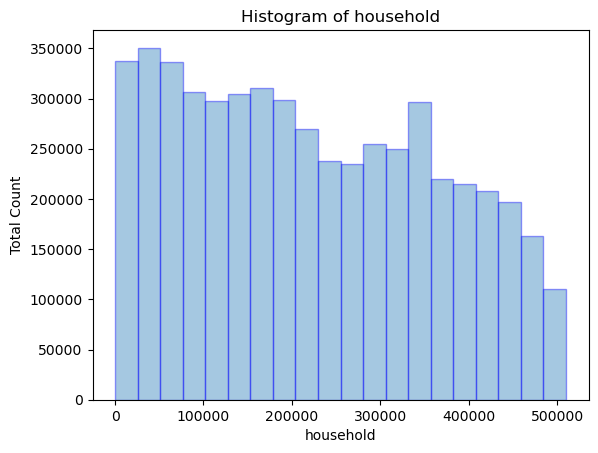

In [42]:
plt.hist(df['household'], bins=20, alpha=0.4, edgecolor = "blue")

# Set labels for the x and y axes
plt.xlabel('household')
plt.ylabel('Total Count')  # Update label to reflect scaling

# Add a title to the plot
plt.title('Histogram of household')

# Show the plot
plt.show()

#### if 'time_of_transaction', 'geography', 'week', 'household', 'store', 'basket', 'day', 'coupon' is the same value we will assume that is the same receipt.

In [18]:
# create receipts if 'time_of_transaction', 'geography', 'week', 'household', 'store', 'basket', 'day', 'coupon'
# is the same value we will assume that is the same receipt
# Group by receipt (assuming same time_of_transaction etc. defines a receipt)
receipts = df.groupby(['time_of_transaction', 'geography', 'week', 'household', 'store', 'basket', 'day', 'coupon'])
len(receipts)

3358620

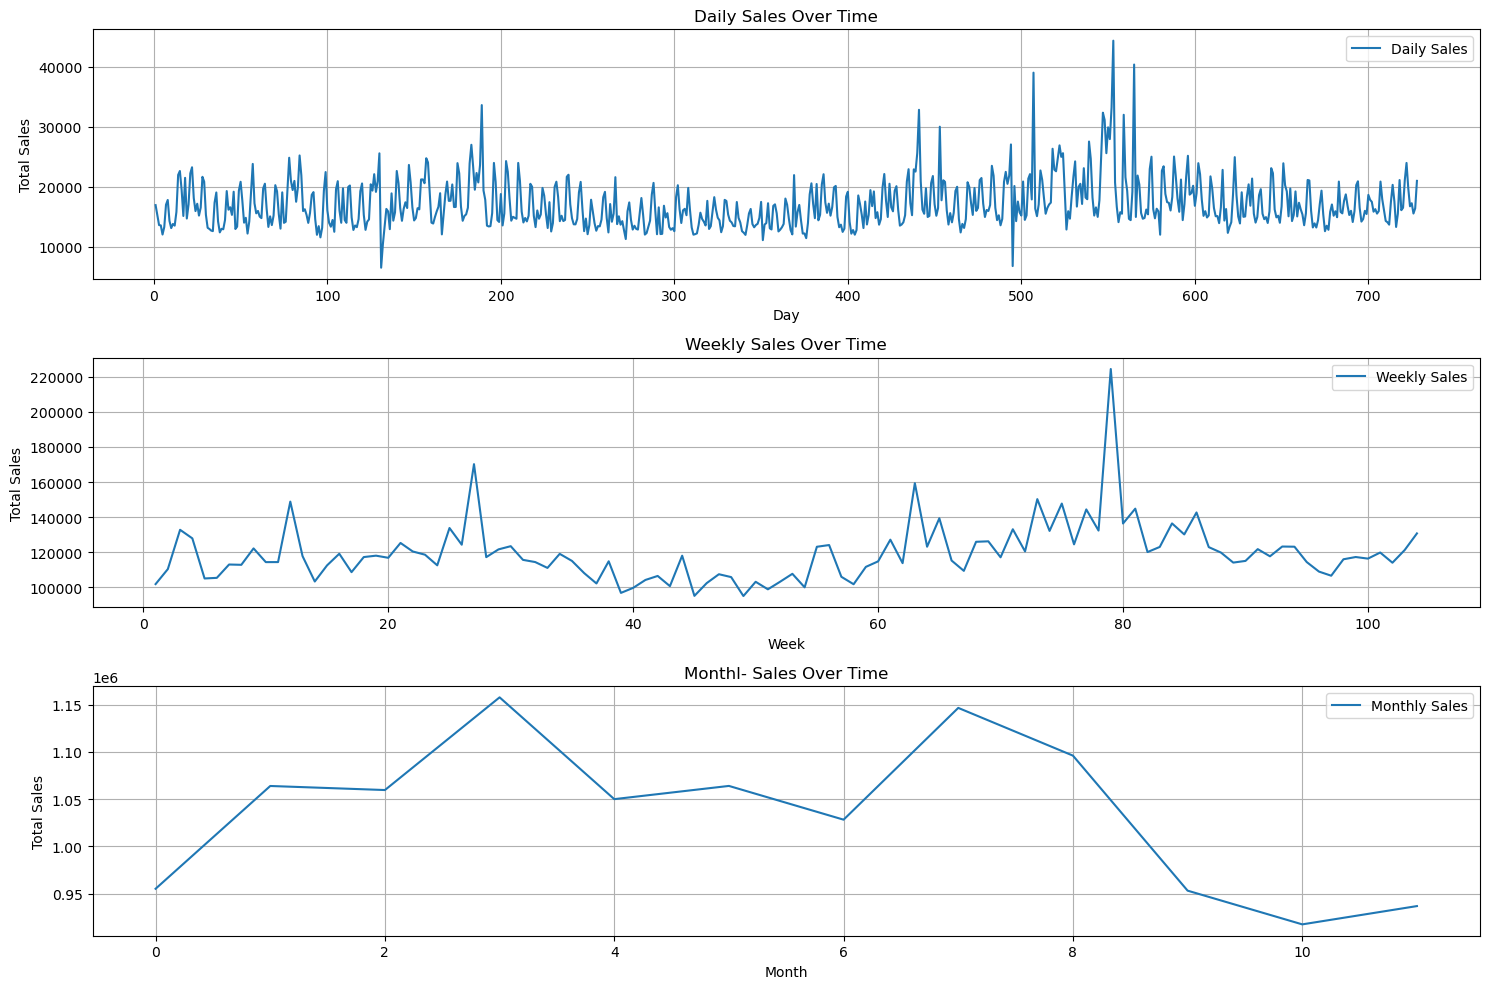

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df_transaction' is your dataframe

# Calculate cumulative sales
df['sales_by_time'] = df['dollar_sales'] * df['units']

# Group data and calculate cumulative sum
df_day_sales = df.groupby('day')['sales_by_time'].sum()
df_week_sales = df.groupby('week')['sales_by_time'].sum()
df_month_sales = df.groupby('month')['sales_by_time'].sum()

# Create subplots for each chart
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 10))  # Adjust figure size as needed

# Day chart
ax1.plot(df_day_sales.index, df_day_sales.values, label='Daily Sales')
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Sales')
ax1.set_title('Daily Sales Over Time')
ax1.grid(True)
ax1.legend()

# Week chart
ax2.plot(df_week_sales.index, df_week_sales.values, label='Weekly Sales')
ax2.set_xlabel('Week')
ax2.set_ylabel('Total Sales')
ax2.set_title('Weekly Sales Over Time')
ax2.grid(True)
ax2.legend()

# Month chart
ax3.plot(df_month_sales.index, df_month_sales.values, label='Monthly Sales')
ax3.set_xlabel('Month')
ax3.set_ylabel('Total Sales')
ax3.set_title('Monthl- Sales Over Time')
ax3.grid(True)
ax3.legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [20]:
grouped_by_commodity = df.groupby('commodity')['dollar_sales'].sum().sort_values(ascending=False)

# Iterate through each commodity group
for commodity, total_sales in grouped_by_commodity.items():
  # Select the top 3 brands for the current commodity
  top_3_brands = (df[df['commodity'] == commodity]
                  .groupby('brand')['dollar_sales'].sum()
                  .sort_values(ascending=False)
                  .head(3))

  # Print the results in a readable format
  print(f"Top 3 brands for {commodity}:")
  for brand, sales in top_3_brands.items():
    print(f"\t- {brand}: ${sales:.2f}")  # Format sales with 2 decimal places
  print() 

Top 3 brands for pasta sauce:
	- Ragu: $1500754.58
	- Prego: $799932.23
	- Classico: $438178.47

Top 3 brands for pasta:
	- Private Label: $995201.26
	- Barilla: $433764.78
	- Creamette: $271543.31

Top 3 brands for syrups:
	- Aunt Jemima: $359668.92
	- Private Label: $352930.86
	- Mrs Butterworth: $159165.47

Top 3 brands for pancake mixes:
	- Aunt Jemima: $206698.12
	- Hungry Jack: $111435.32
	- Private Label: $73616.82



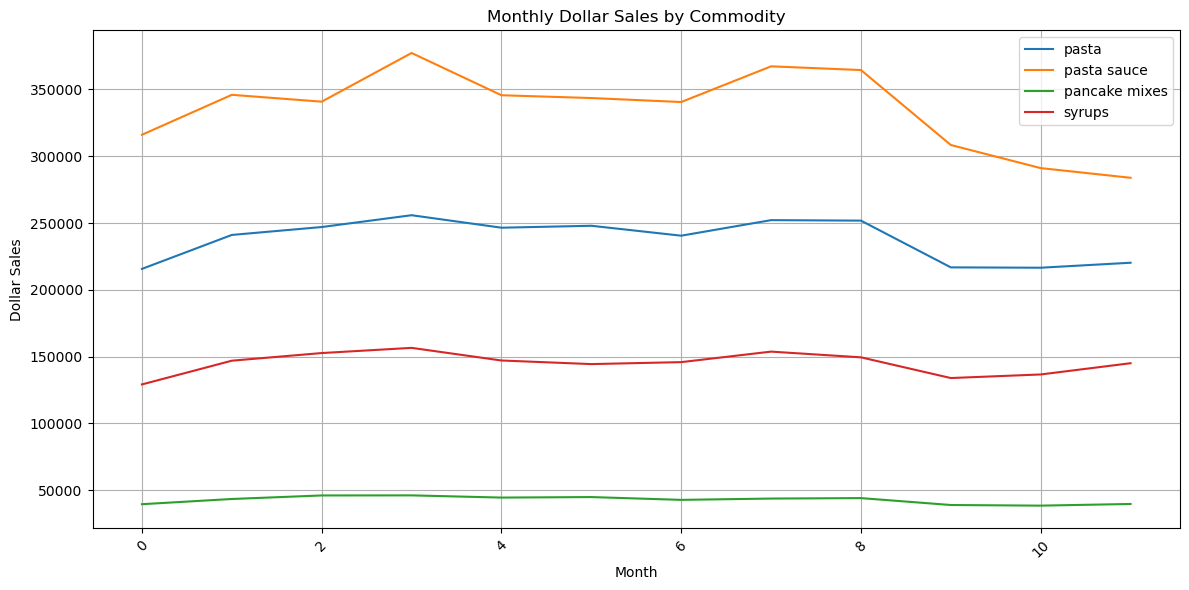

In [21]:
# Filter data for the 4 commodities
pasta_data = df[df['commodity'] == 'pasta']
pasta_sauce_data = df[df['commodity'] == 'pasta sauce']
pancake_mixes_data = df[df['commodity'] == 'pancake mixes']
syrups_data = df[df['commodity'] == 'syrups']

# Group data by month and get dollar_sales sum
pasta_monthly_sales = pasta_data.groupby('month')['dollar_sales'].sum()
pasta_sauce_monthly_sales = pasta_sauce_data.groupby('month')['dollar_sales'].sum()
pancake_mixes_monthly_sales = pancake_mixes_data.groupby('month')['dollar_sales'].sum()
syrups_monthly_sales = syrups_data.groupby('month')['dollar_sales'].sum()

# Create the line charts
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot pasta sales
plt.plot(pasta_monthly_sales.index, pasta_monthly_sales.values, label='pasta')

# Plot pasta sauce sales (add more plots for pancake mixes and syrups)
plt.plot(pasta_sauce_monthly_sales.index, pasta_sauce_monthly_sales.values, label='pasta sauce')
plt.plot(pancake_mixes_monthly_sales.index, pancake_mixes_monthly_sales.values, label='pancake mixes')
plt.plot(syrups_monthly_sales.index, syrups_monthly_sales.values, label='syrups')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Dollar Sales')
plt.title('Monthly Dollar Sales by Commodity')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability if there are many months
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()

# print(pasta_monthly_sales)
# print(pasta_sauce_monthly_sales)
# print(pancake_mixes_monthly_sales)
# print(syrups_monthly_sales)

plt.show()

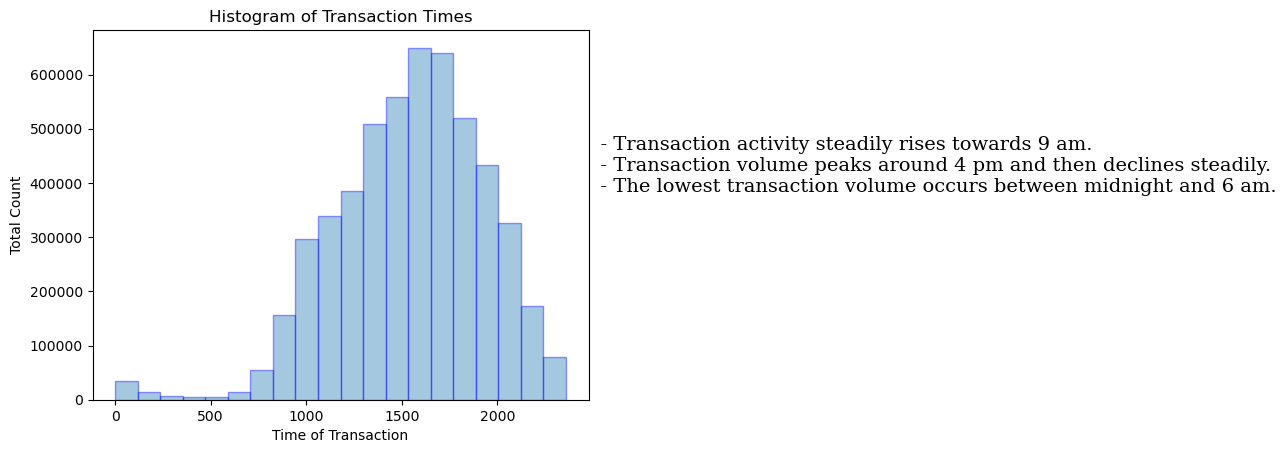

In [22]:
plt.hist(df['time_of_transaction'], bins=20, alpha=0.4, edgecolor = "blue")

# Set labels for the x and y axes
plt.xlabel('Time of Transaction')
plt.ylabel('Total Count')  # Update label to reflect scaling

# Add a title to the plot
plt.title('Histogram of Transaction Times')

plt.figtext(
    0.88,  # Centered horizontally (0=left, 1=right)
    0.5,  # Slightly above bottom (0=bottom, 1=top)
    """
    - Transaction activity steadily rises towards 9 am.
    - Transaction volume peaks around 4 pm and then declines steadily.
    - The lowest transaction volume occurs between midnight and 6 am.
    """,
    fontsize=14,
    fontweight='light',
    fontfamily='serif',
)

# Show the plot
plt.show()

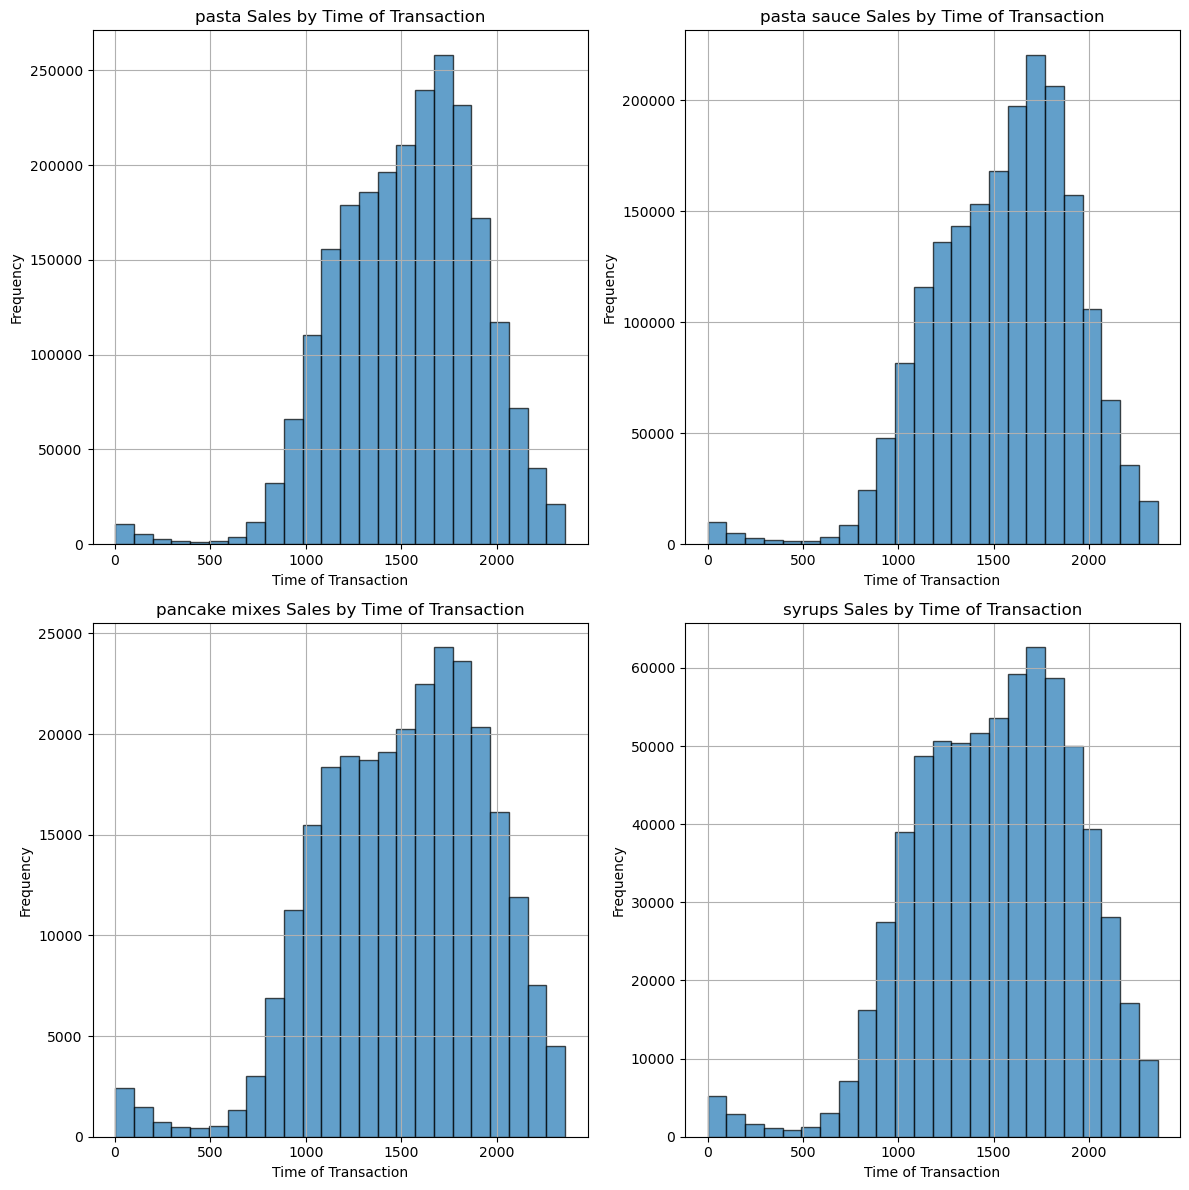

In [23]:
# Define commodities of interest
commodities = ['pasta', 'pasta sauce', 'pancake mixes', 'syrups']

# Create a 2x2 grid of subplots (4 charts)
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # Adjust figure size as needed

# Generate histogram for each commodity and time_of_transaction
for i, commodity in enumerate(commodities):
    row = i // 2
    col = i % 2
    df_filtered = df[df['commodity'] == commodity]
    axes[row, col].hist(df_filtered['time_of_transaction'], bins=24, edgecolor='k', alpha=0.7)
    axes[row, col].set_title(f'{commodity} Sales by Time of Transaction')
    axes[row, col].set_xlabel('Time of Transaction')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True)

# Tight layout for better spacing
plt.tight_layout()

# Show the histogram charts
plt.show()


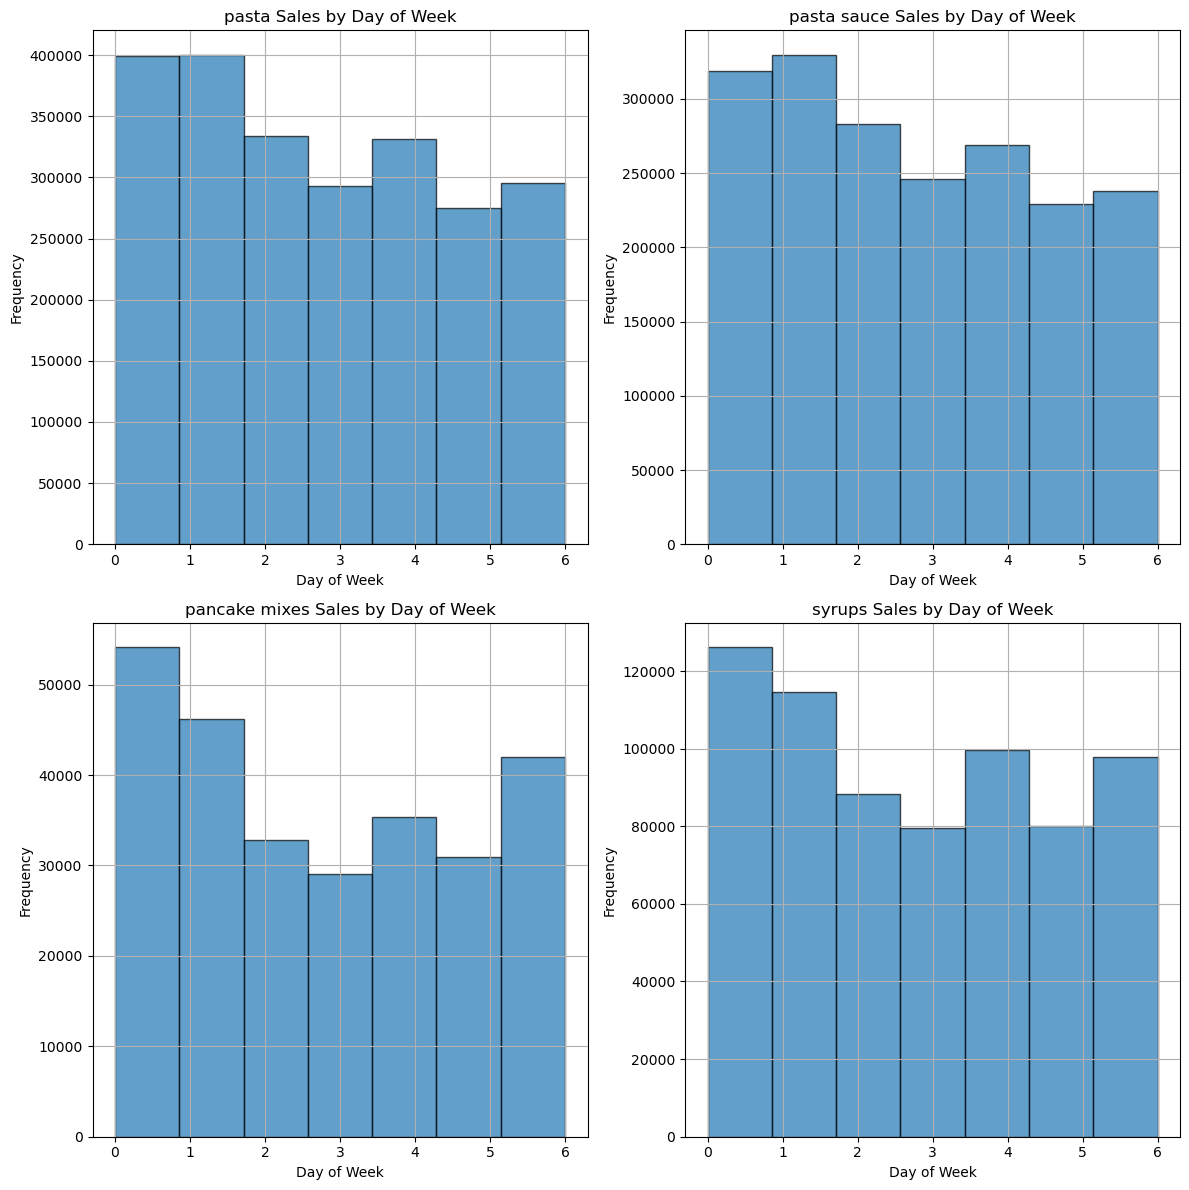

In [24]:
# Define commodities of interest
commodities = ['pasta', 'pasta sauce', 'pancake mixes', 'syrups']

# Create a 2x2 grid of subplots (4 charts)
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # Adjust figure size as needed

# Generate histogram for each commodity and day_of_week
for i, commodity in enumerate(commodities):
    row = i // 2
    col = i % 2
    df_filtered = df[df['commodity'] == commodity]
    axes[row, col].hist(df_filtered['day_of_week'], bins=7, edgecolor='k', alpha=0.7)
    axes[row, col].set_title(f'{commodity} Sales by Day of Week')
    axes[row, col].set_xlabel('Day of Week')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True)

# Tight layout for better spacing
plt.tight_layout()

# Show the histogram charts
plt.show()


day_of_week_name
Monday       1572721.66
Tuesday      1295039.05
Wednesday    1137378.00
Thursday     1283897.99
Friday       1082693.64
Saturday     1186955.05
Sunday       1571394.50
Name: dollar_sales, dtype: float64
day_of_week_name
Monday       1052611
Tuesday       875529
Wednesday     774956
Thursday      882046
Friday        744529
Saturday      812466
Sunday       1077490
Name: units, dtype: int64


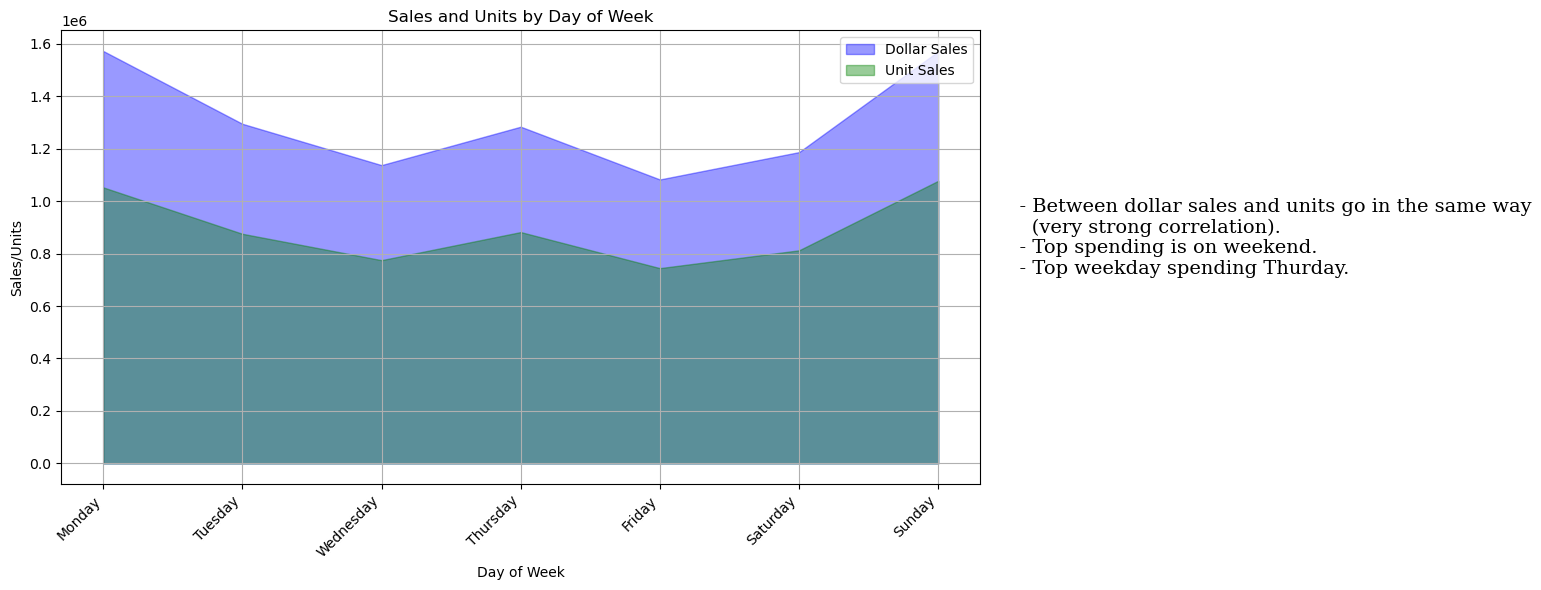

In [25]:
day_of_week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Group by day of week name and sum dollar sales and re order day
df_day_of_week_dollar_sales = df.groupby('day_of_week_name')['dollar_sales'].sum()
df_day_of_week_dollar_sales = df_day_of_week_dollar_sales.reindex(day_of_week_order)

df_day_of_week_units_sales = df.groupby('day_of_week_name')['units'].sum()
df_day_of_week_units_sales = df_day_of_week_units_sales.reindex(day_of_week_order)

print(df_day_of_week_dollar_sales)
print(df_day_of_week_units_sales)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot dollar sales (area) with blue color and transparency (alpha)
plt.fill_between(df_day_of_week_dollar_sales.index, 0, df_day_of_week_dollar_sales.values, alpha=0.4, label='Dollar Sales', color='blue')

# Plot unit sales (area) with green color and transparency (alpha)
plt.fill_between(df_day_of_week_units_sales.index, 0, df_day_of_week_units_sales.values, alpha=0.4, label='Unit Sales', color='green')

# Set labels and title
plt.xlabel('Day of Week')
plt.ylabel('Sales/Units')
plt.title('Sales and Units by Day of Week')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend()

# Grid and tight layout
plt.grid(True)

plt.figtext(
    1,  # Centered horizontally (0=left, 1=right)
    0.5,  # Slightly above bottom (0=bottom, 1=top)
    """
    - Between dollar sales and units go in the same way
      (very strong correlation).
    - Top spending is on weekend.
    - Top weekday spending Thurday.
    """,
    fontsize=14,
    fontweight='light',
    fontfamily='serif',
)

plt.tight_layout()

plt.show()


Average pancake mixes dollar sales per household is 3.92
Average pasta dollar sales per household is 6.93
Average pasta sauce dollar sales per household is 11.11
Average syrups dollar sales per household is 6.79


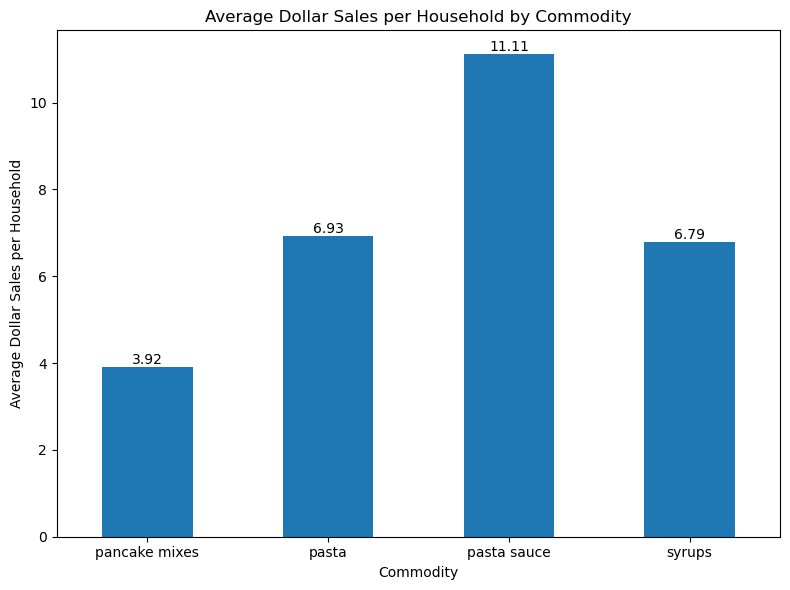

In [26]:
num_unique_households = len(df['household'].unique())

# Calculate average dollar sales per household for each commodity
commodity_sales = df.groupby(['commodity', 'household'])['dollar_sales'].sum()
average_sales_per_household = commodity_sales.groupby('commodity').mean()

# Print the results
for commodity in average_sales_per_household.index:
    average_sales = average_sales_per_household.loc[commodity]
    print(f"Average {commodity} dollar sales per household is {average_sales:.2f}")

# Create the bar chart
plt.figure(figsize=(8, 6))
average_sales_per_household.plot(kind='bar')
plt.xlabel('Commodity')
plt.ylabel('Average Dollar Sales per Household')
plt.title('Average Dollar Sales per Household by Commodity')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Add value labels on top of bars
for bar in plt.gca().containers[0]:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.2f}", ha='center', va='bottom')

plt.show()

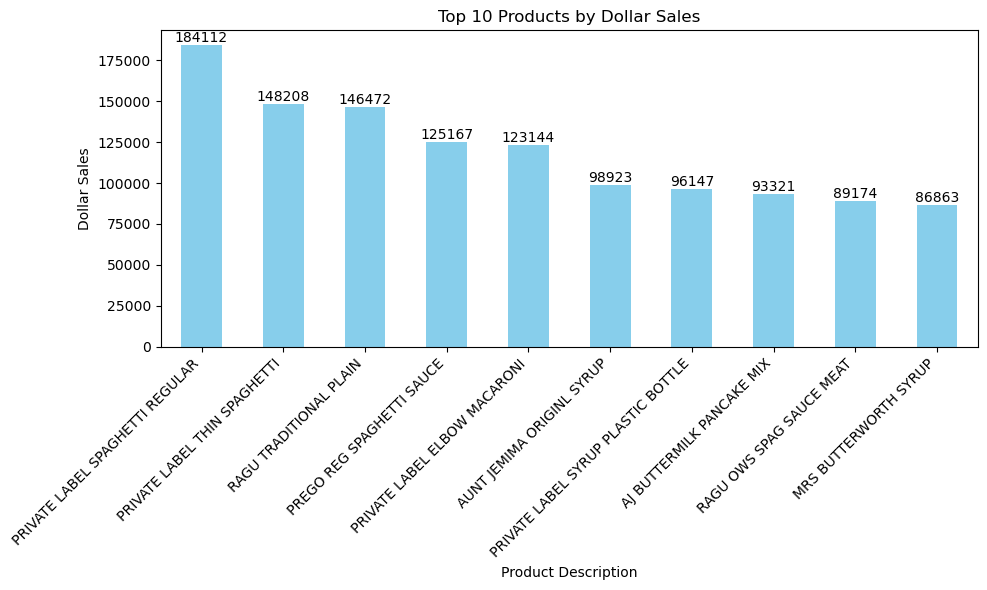

In [27]:
upc_grouped = df.groupby('product_description').agg({
    'dollar_sales': 'sum'
})

# Get the top 10 products by 'dollar_sales'
top_10_products = upc_grouped.nlargest(10, 'dollar_sales')

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = top_10_products['dollar_sales'].plot(kind='bar', color='skyblue')

# Add count labels on top of each bar
for rect in bars.patches:
  y_value = rect.get_height()
  x_value = rect.get_x() + rect.get_width() / 2  # Center the label
  count_str = f"{y_value:.0f}"  # Format count as integer
  plt.text(x_value, y_value + 0.1, count_str, ha='center', va='bottom')  # Adjust position slightly above the bar

plt.title('Top 10 Products by Dollar Sales')
plt.xlabel('Product Description')
plt.ylabel('Dollar Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the bar chart
plt.show()

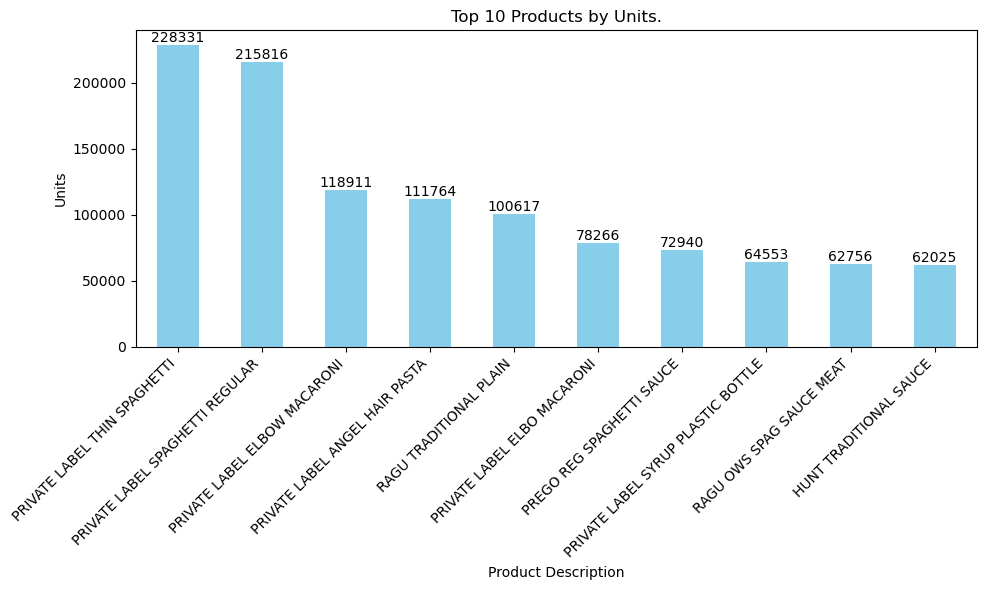

In [28]:
upc_grouped = df.groupby('product_description').agg({
    'units': 'sum'
})

# Get the top 10 products by 'dollar_sales'
top_10_products = upc_grouped.nlargest(10, 'units')

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = top_10_products['units'].plot(kind='bar', color='skyblue')

# Add count labels on top of each bar
for rect in bars.patches:
  y_value = rect.get_height()
  x_value = rect.get_x() + rect.get_width() / 2  # Center the label
  count_str = f"{y_value:.0f}"  # Format count as integer
  plt.text(x_value, y_value + 0.1, count_str, ha='center', va='bottom')  # Adjust position slightly above the bar

plt.title('Top 10 Products by Units.')
plt.xlabel('Product Description')
plt.ylabel('Units')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the bar chart
plt.show()

<Axes: ylabel='count'>

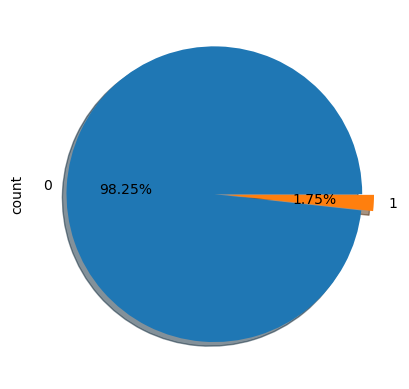

In [29]:
df.coupon.unique()
df["coupon"].value_counts().plot.pie(autopct='%1.2f%%',explode=[0,0.08], shadow = True)

In [30]:
df_filtered_sold_with_coupon = df[df['coupon'] == 1]

# Group data by upc and calculate total dollar sales and total units sold
upc_totals_units = df_filtered_sold_with_coupon.groupby('product_description').agg({
    'units': 'sum'
})

# Sort upc_totals by dollar_sales in descending order and select the top 20
top_20_units_coupon = upc_totals_units.sort_values(by='units', ascending=False).head(20)

# Display the top 20 upcs with their total dollar sales and total units
print("Top 20 toltal product sales with Coupons (Units Sold):")
top_20_units_coupon

Top 20 toltal product sales with Coupons (Units Sold):


,units
product_description,
RAGU TRADITIONAL PLAIN,5083
RAGU OWS SPAG SAUCE MEAT,2777
NRTHWDS BTR MPL FLV SYRUP,2599
RAGU\HEARTY ONION/GARLIC,2039
AUNT JEMIMA ORIGINL SYRUP,2028
RAGU HEARTY ITAL PSTA SCE,1962
PREGO REG SPAGHETTI SAUCE,1947
RAGU ROBUSTO PARM ROMANO,1863
H J PANCK BTRMLK COMP MIX,1795


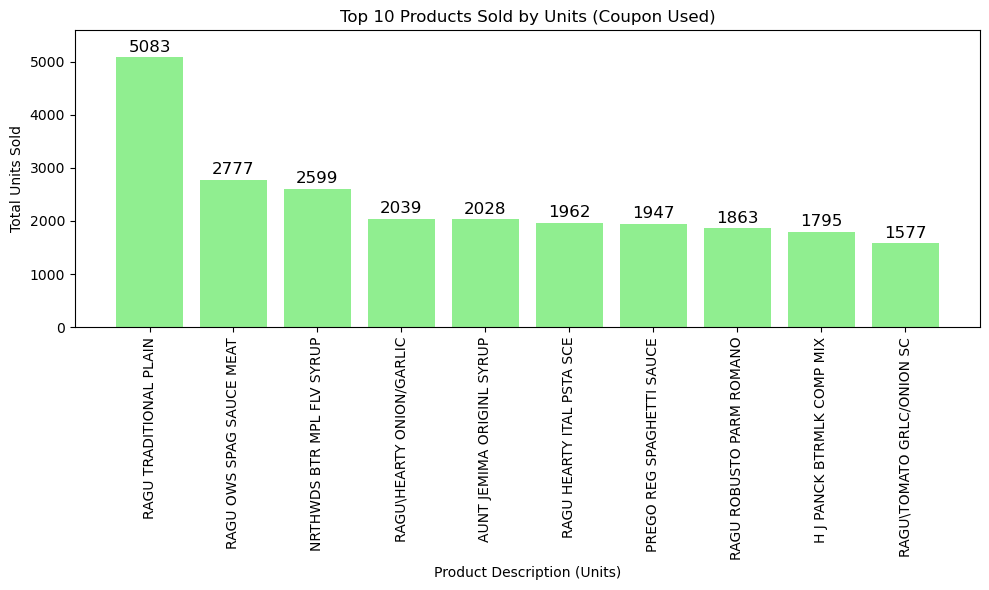

In [31]:
top_units_10 = top_20_units_coupon.head(10)
plt.figure(figsize=(10, 6))

# Create the bar chart and set the y-axis limits slightly higher than the maximum units sold
plt.bar(top_units_10.index, top_units_10['units'], color='lightgreen')
plt.ylim(0, top_units_10['units'].max() * 1.1)  # Adjust y-axis limit for better value placement

# Annotate each bar with the corresponding unit count
for i, v in enumerate(top_units_10['units']):
    plt.text(i, v + 50, f"{v}", ha='center', va='bottom', fontsize=12)  # Add offset to avoid label overlap

plt.xlabel('Product Description (Units)')
plt.ylabel('Total Units Sold')
plt.title('Top 10 Products Sold by Units (Coupon Used)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [32]:
df_filtered_sold_with_coupon = df[df['coupon'] == 1]

# Group data by upc and calculate total dollar sales and total units sold
upc_totals_dollar = df_filtered_sold_with_coupon.groupby('product_description').agg({
    'dollar_sales': 'sum'
})

# Sort upc_totals by dollar_sales in descending order and select the top 20
top_20_dollar_sales_coupon = upc_totals_dollar.sort_values(by='dollar_sales', ascending=False).head(20)

# Display the top 20 upcs with their total dollar sales and total units
print("\n\nTop 20 Product solds with Coupons (Dollar Sales):")
top_20_dollar_sales_coupon



Top 20 Product solds with Coupons (Dollar Sales):


,dollar_sales
product_description,
AUNT JEMIMA ORIGINL SYRUP,4835.71
RAGU TRADITIONAL PLAIN,4239.39
LOG CABIN SYRUP REG,3418.19
RAGU MAMAS MEAT SAUCE,3394.10
AUNT JEMIMA LITE SYRUP,2808.71
QUAKER AUNT JAM BUTR LITE,2747.43
PILL H J MMV REG SYRUP,2737.72
NRTHWDS BTR MPL FLV SYRUP,2718.32
BERTOLLI TOM&BASIL SAUCE,2487.09


/var/folders/x1/9dnsp2h17bb4gmtcndhj0zkc0000gn/T/ipykernel_23459/2281474053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_sales_10['dollar_sales'] = top_sales_10['dollar_sales'].round(2)


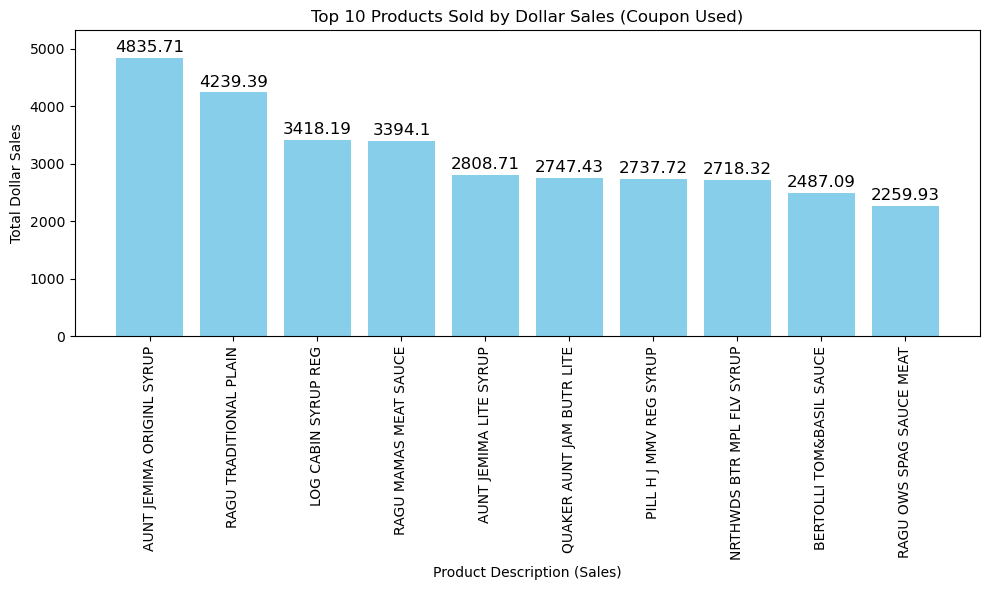

In [33]:
top_sales_10 = top_20_dollar_sales_coupon.head(10)
top_sales_10['dollar_sales'] = top_sales_10['dollar_sales'].round(2)

plt.figure(figsize=(10, 6))
plt.bar(top_sales_10.index, top_sales_10['dollar_sales'], color='skyblue')
plt.ylim(0, top_sales_10['dollar_sales'].max() * 1.1)

# Add data labels (quantity) on top of each bar
for i, v in enumerate(top_sales_10['dollar_sales']):
    plt.text(i, v + 50, f"{v}", ha='center', va='bottom', fontsize=12)  # Adjust vertical offset (50) as needed

plt.xlabel('Product Description (Sales)')
plt.ylabel('Total Dollar Sales')
plt.title('Top 10 Products Sold by Dollar Sales (Coupon Used)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [34]:
df['first_purchase'] = df.groupby(['upc', 'household'])['day'].transform('min') == df['day']

# Filter customers who used a coupon for their first purchase
coupon_first_purchase = df[(df['first_purchase'] == True) & (df['coupon'] == True)]

# Group by upc-household and calculate subsequent purchases
subsequent_purchases = coupon_first_purchase.groupby(['upc', 'household'])['day'].size() - 1

# Count customers with subsequent purchases
num_customers_repurchasing = subsequent_purchases.gt(0).sum()

# Print results
print("Number of customers who used a coupon for their first purchase of an item/category and made subsequent purchases:", num_customers_repurchasing)

# Calculate total number of customers who used a coupon
total_coupon_users = df[df['coupon'] == True].shape[0]  # Count rows where 'coupon' is True

# Calculate the percentage
percentage_repurchasing = (num_customers_repurchasing / total_coupon_users) * 100

# Print the result
print(f"Percentage of customers who used a coupon for their first purchase and made subsequent purchases: {percentage_repurchasing:.2f}%")


Number of customers who used a coupon for their first purchase of an item/category and made subsequent purchases: 117
Percentage of customers who used a coupon for their first purchase and made subsequent purchases: 0.13%


In [35]:
df['upc'] = df['upc'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197681 entries, 0 to 5197680
Data columns (total 22 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  object 
 1   dollar_sales         float64
 2   units                int64  
 3   time_of_transaction  int64  
 4   geography            int64  
 5   week                 int64  
 6   household            int64  
 7   store                int64  
 8   basket               int64  
 9   day                  int64  
 10  coupon               int64  
 11  product_description  object 
 12  commodity            object 
 13  brand                object 
 14  product_size         object 
 15  month                int64  
 16  day_of_week          int64  
 17  week_of_month        int64  
 18  month_name           object 
 19  day_of_week_name     object 
 20  sales_by_time        float64
 21  first_purchase       bool   
dtypes: bool(1), float64(2), int64(12), object(7)
memory usage: 837.7+ 

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

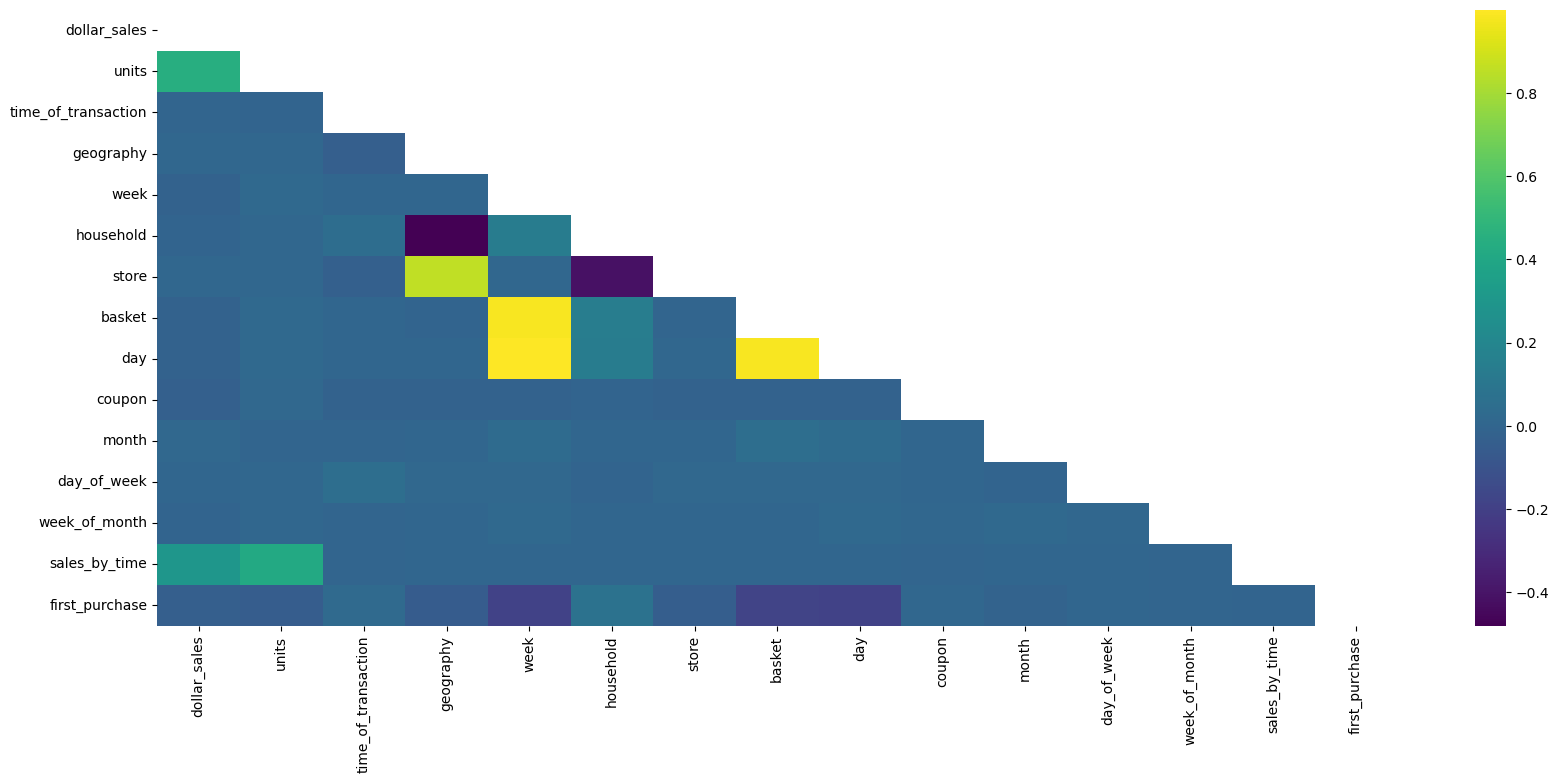

In [36]:
fig, ax = plt.subplots(figsize=(20, 8))
correlation = df[df.columns[(df.dtypes != 'object')]].corr()

mask = np.zeros_like(correlation, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation, annot=True, cmap='viridis', mask=mask)